In [3]:
##新的python库处理栅格数据：rasterio
import rasterio as rio

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [15]:
import geopandas as gpd

In [2]:
path_img = 'E:\开源\chenggong_tif_wgs.tif'


In [ ]:
rsimg = rio.open(path_img)

rsimg.crs
rsimg.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3230,
 'height': 3209,
 'count': 6,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(9.39329906851405e-05, 0.0, 102.69987737807455,
        0.0, -9.39329906851405e-05, 24.99572929743811)}

In [12]:
##归一化水体指数，绿光-中红外/+
rsimg_arr = rsimg.read()
rsimg_arr = np.float16(rsimg_arr)
mndwi = (rsimg_arr[1]-rsimg_arr[4]/rsimg_arr[1]+rsimg_arr[4]+0.00001)
mndwi

C:\Users\yj\AppData\Local\Temp\ipykernel_20792\2175984636.py:4: RuntimeWarning: invalid value encountered in divide
  mndwi = (rsimg_arr[1]-rsimg_arr[4]/rsimg_arr[1]+rsimg_arr[4]+0.00001)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float16)

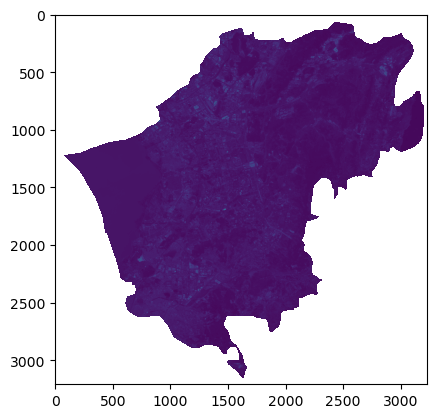

In [13]:
plt.imshow(mndwi)

In [ ]:
##第二个参数'w'表示写文件，默认读
path_out = 'E:\开源\chenggong_tif_wgs_mndwi.tif'
rio.open(path_out, 'w',
         driver=rsimg.driver,
         width=rsimg.width,
         height=rsimg.height,
         count=1,
         dtype=np.float32,
         crs=rsimg.crs,
         transform=rsimg.transform
         )as dst:
dst.write(mndwi,1)

SyntaxError: invalid syntax (788203640.py, line 11)

In [ ]:
path_vec = 'E:\开源\.gpkg'##呈贡区水体矢量
path_img = ''##呈贡区水体栅格作为底图

In [ ]:
rsimg = rio.open(path_img)
rsimg_arr = rsimg_rio.read()
print(rsimg_arr)
vec_gpd = gpd.read_file(path_vec)



In [ ]:
vec_gpd.plot()

In [ ]:
##矢量数据栅格化
from rasterio import features
vec2raster = features.rasterize(shape=vec_gpd.geometry,
                                out_shape=rsimg_arr[0].shape,
                                default_value=1,
                                fill=0,
                                transform=rsimg_rio.transform,
                                dtype=None
                                )

In [ ]:
##得到栅格化后的数据

In [ ]:
##栅格数据矢量化
path_raster = '呈贡水体栅格'
raster_rio = rio.open(path_raster)
raster_arr = raster_rio.read(1)
raster_arr.shape

In [ ]:
raster_rio.meta

In [ ]:
plt.imshow(raster_arr)


In [ ]:
geo

In [ ]:
##矢量化
from shapely.geometry import shape
values, geos = [], []
for geo, value in features.shapes(np.float32(raster_arr), transform=raster_rio.transform):
    ##不保存陆地，查看元数据水体部分的dn，假设为1
    if value==1:
        values.append(value)
        geos.append(geo)

##格式转化为shapely格式
geos = [shape(geo) for geo in geos]
dict = {'DN':values,'geometry':geos}
region_gpd = gpd.GeoDataFrame(dict, crs = 'EPSG:32648')


In [ ]:
geos

In [ ]:
##最后保存，new2中的内容